<a href="https://colab.research.google.com/github/ThanikPimpiban/DWDM21/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd #ส่วนของการ Import
import os

In [22]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
path = '/content/drive/My Drive/DWDM_Project' #กำหนด path ของโฟลเดอร์ที่ Data อยู่

##ที่มาของข้อมูลการจำหน่ายพลังงานไฟฟ้า กฟผ.

In [24]:
data_sell = pd.read_csv(os.path.join(path,'การจำหน่ายพลังงานไฟฟ้า กฟผ..csv')) #กำหนดตัวแปร data_sell เป็นข้อมูลการจำหน่ายพลังงานไฟฟ้า กฟผ.
data_sell #เรียกดูตารางการจำหน่ายพลังงานไฟฟ้า กฟผ.

,ปี,การไฟฟ้านครหลวง,การไฟฟ้าส่วนภูมิภาค,การไฟฟ้าลาว,การไฟฟ้ามาเลเซีย,การไฟฟ้ากัมพูชา,ลูกค้าโดยตรง,อื่น ๆ,รวมทั้งสิ้น
0,2559,"56,585.63","125,798.07",595.02,157.84,146.89,"1,591.85",171.21,"185,046.51"
1,2560,"52,646.13","130,237.60",365.27,132.69,86.80,"1,458.60",203.80,"185,130.89"
2,2561,"53,301.86","131,969.53",253.86,122.58,211.75,"1,339.12",189.84,"187,388.54"
3,2562,"55,002.17","134,605.47","1,316.51",136.14,942.01,"1,346.59",90.26,"193,439.15"
4,2563,"52,343.73","131,558.55","1,375.40",142.56,610.10,"1,378.67",80.38,"187,489.39"


##ที่มาของข้อมูลกำลังผลิตในระบบไฟฟ้าแยกตามประเภทโรงไฟฟ้า

In [25]:
data_production = pd.read_csv(os.path.join(path,'กำลังผลิตในระบบไฟฟ้าแยกตามประเภทโรงไฟฟ้า.csv')) #กำหนดตัวแปร data_production เป็นข้อมูลกำลังผลิตในระบบไฟฟ้าแยกตามประเภทโรงไฟฟ้า
data_production #เรียกดูตารางกำลังผลิตในระบบไฟฟ้าแยกตามประเภทโรงไฟฟ้า

,ปี,พลังความร้อน,พลังน้ำ,กังหันแก๊ส,พลังความร้อนร่วม,ดีเซล,พลังงานทดแทน,ซื้อ,รวมทั้งสิ้น
0,2559,"3,647.00","3,452.40",-,"9,210.00",30.4,45.33,"24,711.12","41,096.25"
1,2560,"3,647.00","3,452.40",-,"8,896.00",30.4,45.33,"26,362.12","42,433.25"
2,2561,"3,647.00","3,472.40",-,"8,582.00",30.4,57.78,"27,582.92","43,372.50"
3,2562,"3,687.00","3,972.40",-,"7,358.00",30.4,83.03,"30,167.42","45,298.25"
4,2563,"3,687.00","3,972.40",-,"8,262.00",30.4,85.52,"29,443.05","46,480.37"


##ที่มาของข้อมูลความยาวสายส่งไฟฟ้า กฟผ.

In [26]:
data_length = pd.read_csv(os.path.join(path,'ความยาวสายส่งไฟฟ้า กฟผ..csv')) #กำหนดตัวแปร data_length ให้เป็นความยาวสายส่งไฟฟ้า กฟผ.
data_length #เรียกดูตารางความยาวสายส่งไฟฟ้า กฟผ.

,ปี,69 kv,115 kv,132 kv,230 kv,300 kv,500 kv,รวมทั้งสิ้น
0,2559,18.8,13497.32,8.71,14793.65,23.07,5025.34,"33,366.88"
1,2560,18.8,13088.64,8.71,14423.13,23.07,5830.84,"33,393.19"
2,2561,18.8,13263.16,8.71,14712.73,23.07,6527.39,"34,553.86"
3,2562,18.8,13997.98,8.71,15357.71,23.07,6575.18,"35,981.45"
4,2563,18.8,14423.19,8.71,15697.87,23.07,6912.29,"37,083.92"


##ทำการเชื่อม 2 ตารางด้วยการ merge โดยเชื่อมกันด้วย ปี

In [27]:
merged_data_sell_data_production = pd.merge(data_sell,data_production,on='ปี') #ทำการเชื่อมตาราง 2 ตาราง คือ 1.ข้อมูลการจำหน่ายพลังงานไฟฟ้า 2.ข้อมูลของกำลังผลิตในระบบไฟฟ้า
merged_data_sell_data_production #เรียกตารางที่เชื่อมกัน 2 ตารางข้างต้นv

,ปี,การไฟฟ้านครหลวง,การไฟฟ้าส่วนภูมิภาค,การไฟฟ้าลาว,การไฟฟ้ามาเลเซีย,การไฟฟ้ากัมพูชา,ลูกค้าโดยตรง,อื่น ๆ,รวมทั้งสิ้น_x,พลังความร้อน,พลังน้ำ,กังหันแก๊ส,พลังความร้อนร่วม,ดีเซล,พลังงานทดแทน,ซื้อ,รวมทั้งสิ้น_y
0,2559,"56,585.63","125,798.07",595.02,157.84,146.89,"1,591.85",171.21,"185,046.51","3,647.00","3,452.40",-,"9,210.00",30.4,45.33,"24,711.12","41,096.25"
1,2560,"52,646.13","130,237.60",365.27,132.69,86.80,"1,458.60",203.80,"185,130.89","3,647.00","3,452.40",-,"8,896.00",30.4,45.33,"26,362.12","42,433.25"
2,2561,"53,301.86","131,969.53",253.86,122.58,211.75,"1,339.12",189.84,"187,388.54","3,647.00","3,472.40",-,"8,582.00",30.4,57.78,"27,582.92","43,372.50"
3,2562,"55,002.17","134,605.47","1,316.51",136.14,942.01,"1,346.59",90.26,"193,439.15","3,687.00","3,972.40",-,"7,358.00",30.4,83.03,"30,167.42","45,298.25"
4,2563,"52,343.73","131,558.55","1,375.40",142.56,610.10,"1,378.67",80.38,"187,489.39","3,687.00","3,972.40",-,"8,262.00",30.4,85.52,"29,443.05","46,480.37"


##ทำการเชื่อมตารางทั้งหมดเข้าด้วยกัน

In [28]:
merged_3_tables = pd.merge(merged_data_sell_data_production,data_length,on='ปี') #ทำเชื่อมตารางระหว่าง 1.ตารางการจำหน่ายพลังงานไฟฟ้าและกำลังผลิตในระบบไฟฟ้า 2.ตารางความยาวสายส่งไฟฟ้า
merged_3_tables #เรียกดูตารางที่เชื่อมกันทั้ง 3 ตาราง

,ปี,การไฟฟ้านครหลวง,การไฟฟ้าส่วนภูมิภาค,การไฟฟ้าลาว,การไฟฟ้ามาเลเซีย,การไฟฟ้ากัมพูชา,ลูกค้าโดยตรง,อื่น ๆ,รวมทั้งสิ้น_x,พลังความร้อน,พลังน้ำ,กังหันแก๊ส,พลังความร้อนร่วม,ดีเซล,พลังงานทดแทน,ซื้อ,รวมทั้งสิ้น_y,69 kv,115 kv,132 kv,230 kv,300 kv,500 kv,รวมทั้งสิ้น
0,2559,"56,585.63","125,798.07",595.02,157.84,146.89,"1,591.85",171.21,"185,046.51","3,647.00","3,452.40",-,"9,210.00",30.4,45.33,"24,711.12","41,096.25",18.8,13497.32,8.71,14793.65,23.07,5025.34,"33,366.88"
1,2560,"52,646.13","130,237.60",365.27,132.69,86.80,"1,458.60",203.80,"185,130.89","3,647.00","3,452.40",-,"8,896.00",30.4,45.33,"26,362.12","42,433.25",18.8,13088.64,8.71,14423.13,23.07,5830.84,"33,393.19"
2,2561,"53,301.86","131,969.53",253.86,122.58,211.75,"1,339.12",189.84,"187,388.54","3,647.00","3,472.40",-,"8,582.00",30.4,57.78,"27,582.92","43,372.50",18.8,13263.16,8.71,14712.73,23.07,6527.39,"34,553.86"
3,2562,"55,002.17","134,605.47","1,316.51",136.14,942.01,"1,346.59",90.26,"193,439.15","3,687.00","3,972.40",-,"7,358.00",30.4,83.03,"30,167.42","45,298.25",18.8,13997.98,8.71,15357.71,23.07,6575.18,"35,981.45"
4,2563,"52,343.73","131,558.55","1,375.40",142.56,610.10,"1,378.67",80.38,"187,489.39","3,687.00","3,972.40",-,"8,262.00",30.4,85.52,"29,443.05","46,480.37",18.8,14423.19,8.71,15697.87,23.07,6912.29,"37,083.92"


In [29]:
merged_3_tables.isnull().any() #เช็คดู missing ของตารางที่เชื่อมกันทั้ง 3 ตาราง

ปี                     False
การไฟฟ้านครหลวง        False
การไฟฟ้าส่วนภูมิภาค    False
การไฟฟ้าลาว            False
การไฟฟ้ามาเลเซีย       False
การไฟฟ้ากัมพูชา        False
ลูกค้าโดยตรง           False
อื่น ๆ                 False
รวมทั้งสิ้น_x          False
พลังความร้อน           False
พลังน้ำ                False
กังหันแก๊ส             False
พลังความร้อนร่วม       False
ดีเซล                  False
พลังงานทดแทน           False
ซื้อ                   False
รวมทั้งสิ้น_y          False
69 kv                  False
115 kv                 False
132 kv                 False
230 kv                 False
300 kv                 False
500 kv                 False
รวมทั้งสิ้น            False
dtype: bool

In [30]:
merged_3_tables.shape #ข้อมูลมี 5 row 24 column

(5, 24)

##ตารางที่ใช้ในการดู challenge

In [31]:
data = merged_3_tables[['ปี','รวมทั้งสิ้น_x','รวมทั้งสิ้น_y','รวมทั้งสิ้น']]
data

,ปี,รวมทั้งสิ้น_x,รวมทั้งสิ้น_y,รวมทั้งสิ้น
0,2559,"185,046.51","41,096.25","33,366.88"
1,2560,"185,130.89","42,433.25","33,393.19"
2,2561,"187,388.54","43,372.50","34,553.86"
3,2562,"193,439.15","45,298.25","35,981.45"
4,2563,"187,489.39","46,480.37","37,083.92"


In [32]:
data.shape #ข้อมูลนี้มี 5 row 4 column

(5, 4)

In [33]:
data.isnull().any() #ตรวจสอบว่าตารางมีค่าว่างหรือไม่ จะเห็นว่าไม่คอลัมน์ที่มีค่าว่าง

ปี               False
รวมทั้งสิ้น_x    False
รวมทั้งสิ้น_y    False
รวมทั้งสิ้น      False
dtype: bool

In [52]:
X=merged_3_tables[['การไฟฟ้านครหลวง','การไฟฟ้าส่วนภูมิภาค','การไฟฟ้าลาว','การไฟฟ้ามาเลเซีย','การไฟฟ้ากัมพูชา','ลูกค้าโดยตรง','อื่น ๆ']]

In [53]:
Y=merged_3_tables[['พลังความร้อน','พลังน้ำ','กังหันแก๊ส','พลังความร้อนร่วม','ดีเซล','พลังงานทดแทน','ซื้อ']]

##DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
mytree = DecisionTreeClassifier() # กำหนดชั้นของ decision tree

In [42]:
T = mytree.fit(X,Y) # สร้าง model ขึ้นมา

ValueError: ignored

In [39]:
from sklearn.tree import plot_tree

AttributeError: ignored

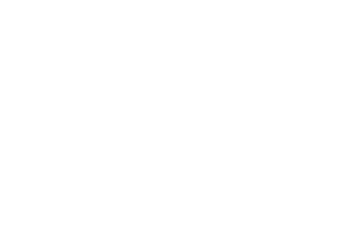

In [40]:
plot_tree(mytree);